## Medical-Insurance Price Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import make_moons
from matplotlib import style
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

#from sklearn.metrics import plot_confusion_matrix

#from sklearn.model_selection import LogisticRegression
#from sklearn.model_selection import train_test_split


In [4]:
#to read csv file
df=pd.read_csv("downloads/med_dataset.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]


In [5]:
#get total info( list the data types )
df.info()
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47 

## data processing

In [6]:
#removing rows of nan values(data cleaning)
df.dropna(axis=0,inplace=True)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]


In [7]:
#converting object to int
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
#replacing male->0 and female->1
df.replace({'age':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southwest':0,'northwest':1,'southeast':2,'northeast':3}},inplace=True)
print(df.tail(10))


      age  sex     bmi  children  smoker  region      charges
2762   21    0  32.680         2       0       1  26018.95052
2763   51    1  37.000         0       0       3   8798.59300
2764   22    0  31.020         3       1       2  35595.58980
2765   47    1  36.080         1       1       2  42211.13820
2766   18    1  23.320         1       0       2   1711.02680
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200


In [8]:
#to check the columns with null value
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
print("no.of rows:",df.shape[0])        
print("no. of cols:",df.shape[1]) 

no.of rows: 2772
no. of cols: 7


In [10]:
print("sex:",df['sex'].unique())
print("region:",df['region'].unique())

sex: [0 1]
region: [3 2 1 0]


In [11]:
print(df.tail(10))

      age  sex     bmi  children  smoker  region      charges
2762   21    0  32.680         2       0       1  26018.95052
2763   51    1  37.000         0       0       3   8798.59300
2764   22    0  31.020         3       1       2  35595.58980
2765   47    1  36.080         1       1       2  42211.13820
2766   18    1  23.320         1       0       2   1711.02680
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200


In [12]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,1.532468,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## plotting

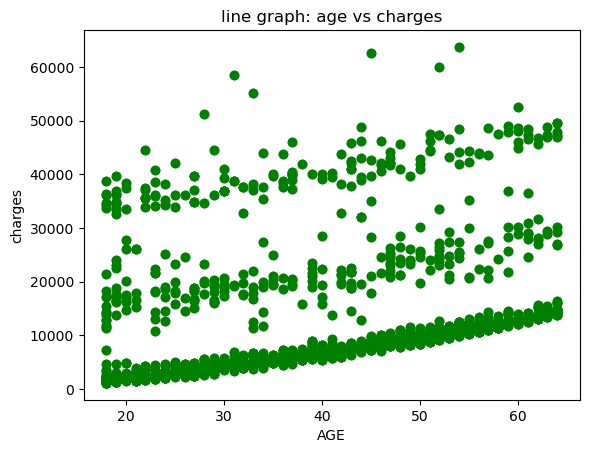

In [13]:
#scatter plot
plt.scatter(df['age'],df['charges'],color='green')
plt.xlabel('AGE')
plt.ylabel('charges')
plt.title('line graph: age vs charges')
plt.show()

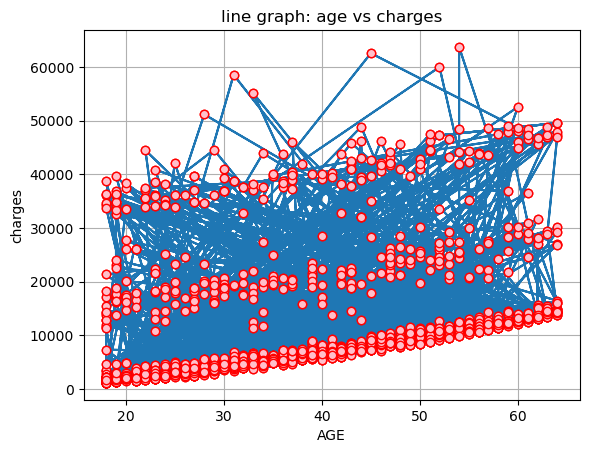

In [14]:
#line graph
plt.plot(df['age'],df['charges'],marker='o',mec='red',mfc='pink')
plt.xlabel('AGE')
plt.ylabel('charges')
plt.title('line graph: age vs charges')
plt.grid()
plt.show()

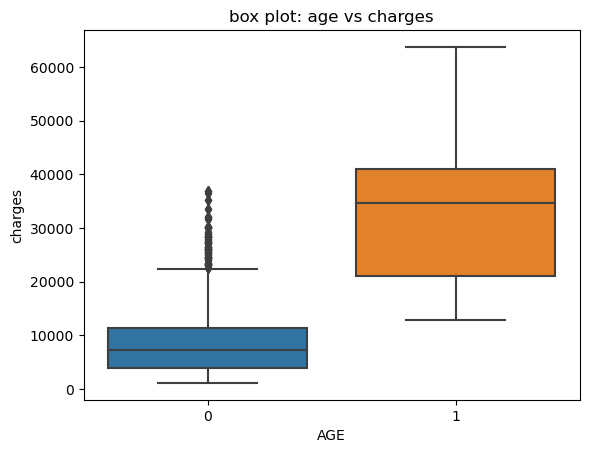

In [15]:
#box plot
sns.boxplot(x='smoker',y='charges',data=df)
plt.xlabel('AGE')
plt.ylabel('charges')
plt.title('box plot: age vs charges')
plt.show()

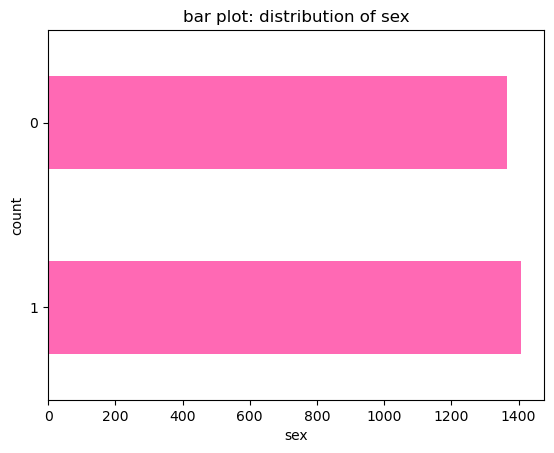

In [16]:
#horizontal bar graph
df['sex'].value_counts().plot(kind='barh',color='hotpink')
plt.xlabel('sex')
plt.ylabel('count')
plt.title('bar plot: distribution of sex')
plt.show()

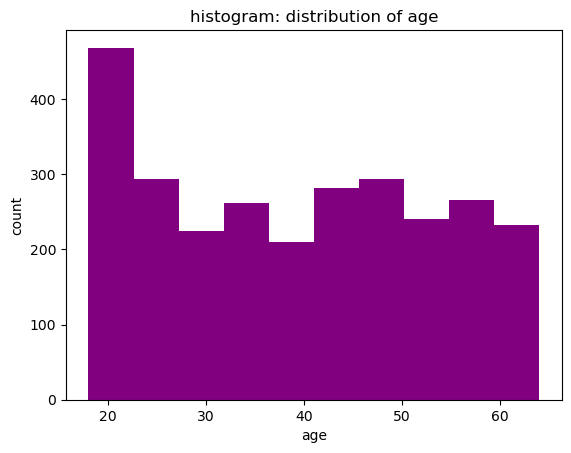

In [17]:
#histogram
x=df['age']
plt.xlabel('age')
plt.ylabel('count')
plt.title('histogram: distribution of age')
plt.hist(x,color='purple')
plt.show()

In [18]:
X = df.drop(columns=['charges'])  
y = df['charges'] 
print(x,y)

0       19
1       18
2       28
3       33
4       32
        ..
2767    47
2768    21
2769    19
2770    23
2771    54
Name: age, Length: 2772, dtype: int64 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


#                   MACHINE LEARNING

In [19]:
#mean
print(np.mean(df['age']))
print(np.mean(df['region']))
print(np.mean(df['bmi']))
print(np.mean(df['charges']))

39.10966810966811
1.5324675324675325
30.70134920634921
13261.369959046897


In [20]:
#median
print(np.median(df['age']))
print(np.median(df['region']))
print(np.median(df['bmi']))
print(np.median(df['charges']))

39.0
2.0
30.447499999999998
9333.014350000001


In [21]:
#mode
print(stats.mode(df['sex']))

ModeResult(mode=array([1]), count=array([1406]))


C:\Users\namra\AppData\Local\Temp\ipykernel_17520\4262224351.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(df['sex']))


In [22]:
#standard deviation
print(np.std(df['age']))
print(np.std(df['region']))
print(np.std(df['bmi']))
print(np.std(df['charges']))

14.07891924594058
1.1032677950476832
6.1283429948218355
12149.576869936856


In [23]:
#variance
print(np.var(df['age']))
print(np.var(df['region']))
print(np.var(df['bmi']))
print(np.var(df['charges']))

198.21596713371608
1.217199827589377
37.556587862181864
147612218.11850464


In [24]:
#percentile
print(np.percentile(df['age'],60)) # 60% of the people are 44 or younger.
print(np.percentile(df['bmi'],73))
print(np.percentile(df['region'],90))
print(np.percentile(df['charges'],45))

44.0
34.3
3.0
8428.0693


## data distribution

[1.96268523 1.02853752 1.01561311 ... 1.         1.         1.79877512]


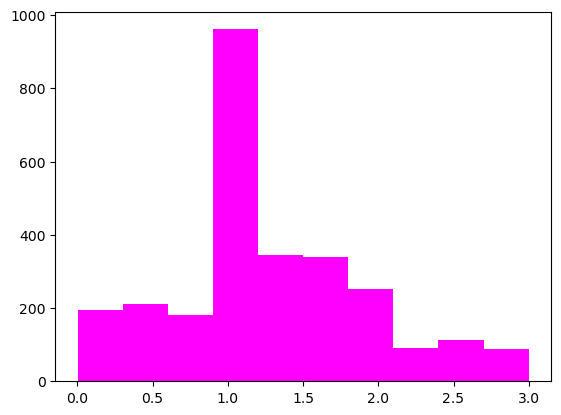

In [29]:
x=np.random.uniform(df['region'])
print(x)
plt.hist(x,color='magenta')
plt.show()

## normal data distribution

[ 2.8218978   2.37817294  2.74894879 ... -0.56159082 -0.69180273
  3.88240693]


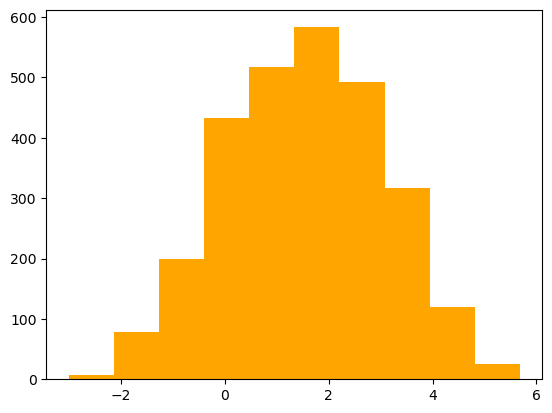

In [30]:
x=np.random.normal(df['region'])
print(x)
plt.hist(x,color='orange')
plt.show()

## random data distribution

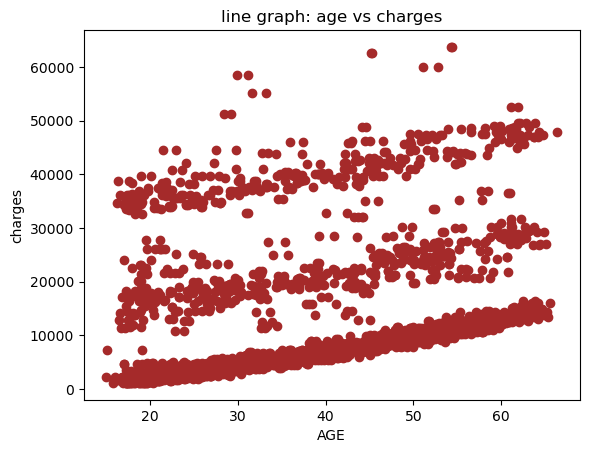

In [30]:
x=np.random.normal(df['age'])
y=np.random.normal(df['charges'])
plt.xlabel('AGE')
plt.ylabel('charges')
plt.title('line graph: age vs charges')
plt.scatter(x,y,color='brown')
plt.show()

## linear regression

257.7009724515883 3182.7704549265545 0.29862366562936293 3.316072999833385e-58 15.648371977951566


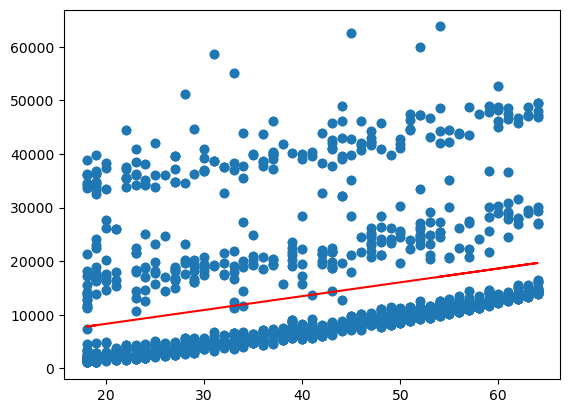

In [31]:
#linear regression
x=df['age']
y=df['charges']
#r= the coefficient of correlation(where 0 means no relationship, and 1 (and -1) means 100% related.)
#P-value is a statistical number to conclude if there is a relationship between x and y.
slope,intercept,r,p,std_err=stats.linregress(x,y)
print(slope,intercept,r,p,std_err)
def myfunc(x): # This new value represents where on the y-axis the corresponding x value will be placed
    return slope*x+intercept
mymodel=list(map(myfunc,x))
#print("array with new values for the y-axis:",mymodel)
plt.scatter(x,y)
plt.plot(x,mymodel,color='red')
plt.show()

## polynomial regression

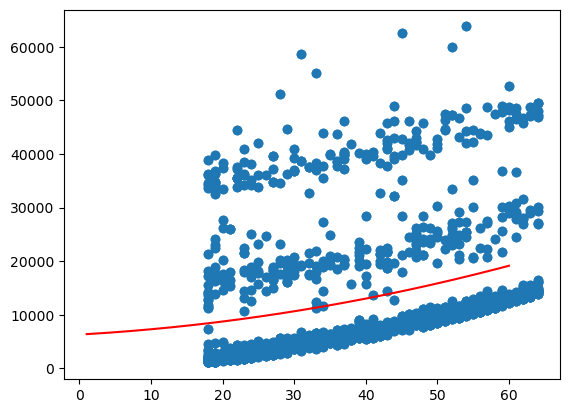

In [32]:
#polynomial regression
x=df['age']
y=df['charges']
mymodel=np.poly1d(np.polyfit(x,y,2))
myline=np.linspace(1,60,60000)
#print(mymodel,myline)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline),color='red')
plt.show()

## train-test

In [39]:
from sklearn.linear_model import LogisticRegression  
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
y=df['smoker']
X=df.drop('smoker',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train,y_train)
y_test_p=lr.predict(X_test)
lr.score(X_test,y_test) #accuracy


0.9365079365079365

## predict

In [36]:
new_data = pd.DataFrame({
     'age': [15],
     'sex': [0],       
     'bmi': [27.9],
     'children': [2],     
     'region': [3],
     'charges':[16884.92400]
 })

new_pred = lr.predict(new_data)
print("smoker:", new_pred)

smoker: [1]


## confusion matrix

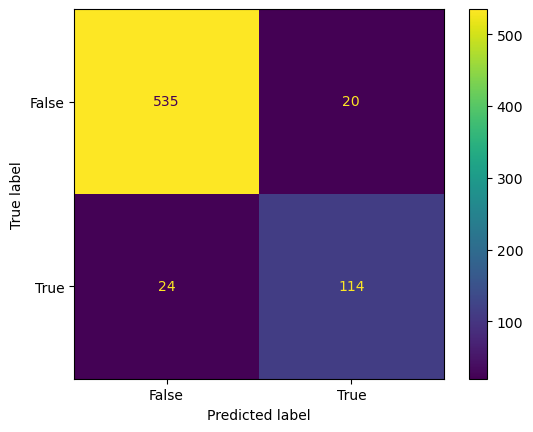

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test,y_test_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


## recall,f1_score,precision

In [38]:
#recall,f1_score,precision
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_test,y_test_p))
print(recall_score(y_test,y_test_p))
print(f1_score(y_test,y_test_p))

0.8507462686567164
0.8260869565217391
0.838235294117647


## scale

In [40]:
#scale used to compare diff values n measurements
scale=StandardScaler()
X=df[['age','charges']]
scaledX=scale.fit_transform(X)
print(scaledX)

[[-1.42835311  0.29824529]
 [-1.49938129 -0.94948308]
 [-0.7890995  -0.72528517]
 ...
 [-1.42835311  0.26252147]
 [-1.14424039  0.68595083]
 [ 1.05763316 -0.28074541]]


In [43]:
#Train/Test - to measure the accuracy of your model
#Train the model means create the model
#Test the model means test the accuracy of the model

#removes the column
#X = df.drop(columns=['charges'])  
#y = df['charges'] 

#print(X,y)
r2 = r2_score(y_test, y_test_p)
#print(y_train,y_pred)
print(r2)


0.6018801410105757


## KNN

[1]


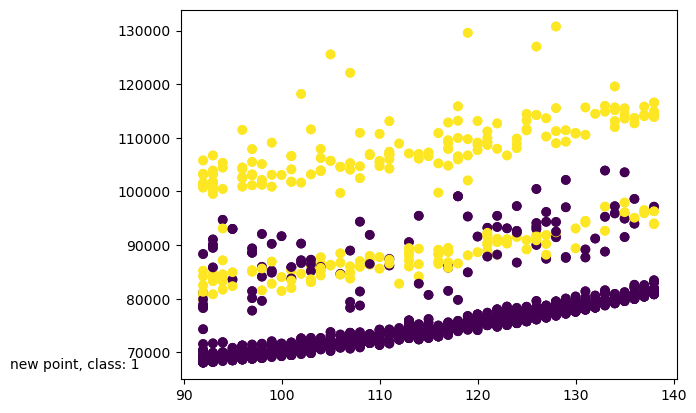

In [37]:
#knn-K nearest neighbors
x=df['age']
y=df['charges']
classes=df['smoker']
data = list(zip(x, y))
#print(data)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
new_x = 74
new_y = 66991.45
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

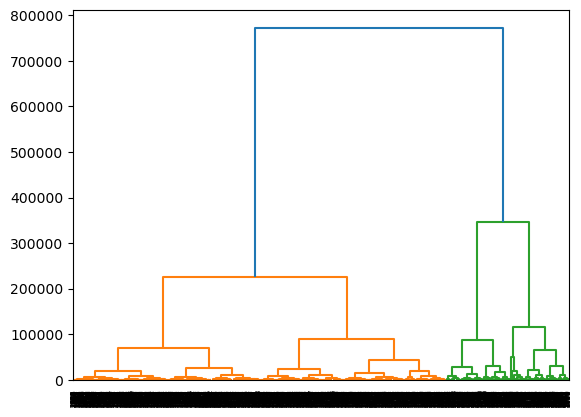

In [149]:
# hirarchial clustering-unsupervised(model does not have to be trained) learning method for clustering data points. 
x=df['sex']
y=df['charges']
data = list(zip(x, y))# zip->pairs the data of x n y
#print(data)-> turns data to points
ld = linkage(data, method='ward', metric='euclidean')#linkage between points
#euclidian-distance measure, ward-linkage, it minimize the variance b|w clusters
dendrogram(ld)

plt.show()

C:\Users\namra\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[2 0 0 ... 0 2 0]


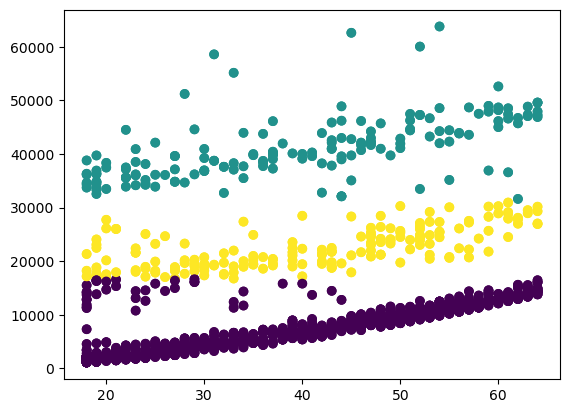

In [150]:
#hirarchial clustering
x=df['age']
y=df['charges']
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(data)
print(labels)
plt.scatter(x, y, c=labels)
plt.show()

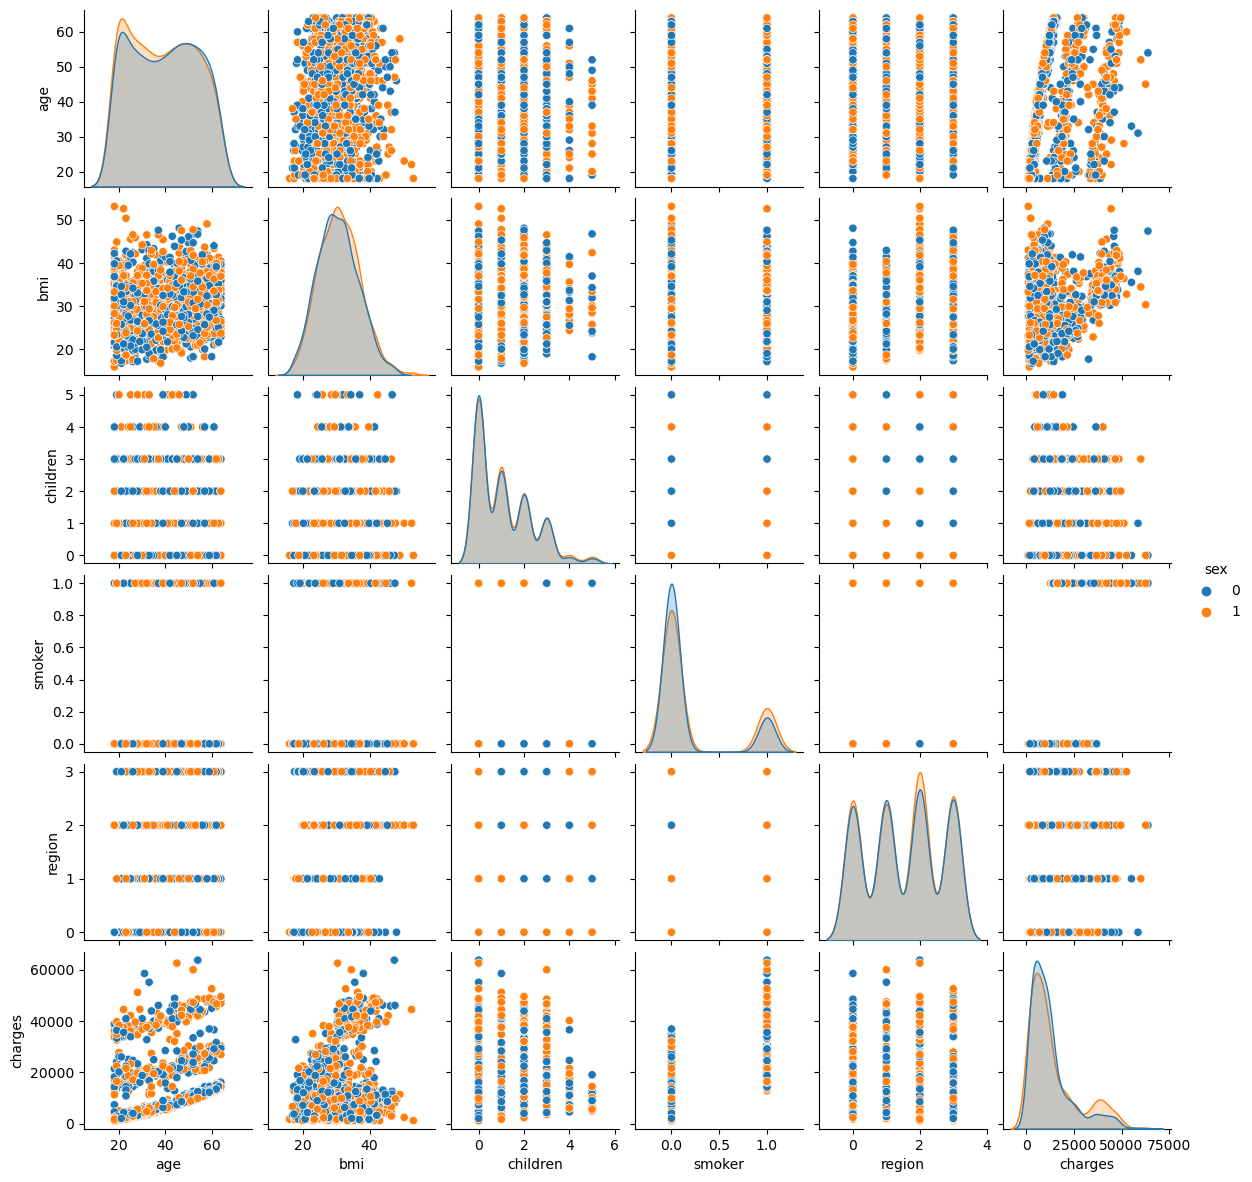

In [42]:
sns.pairplot(df, hue='sex', height=2)

## Ordinary Least Square

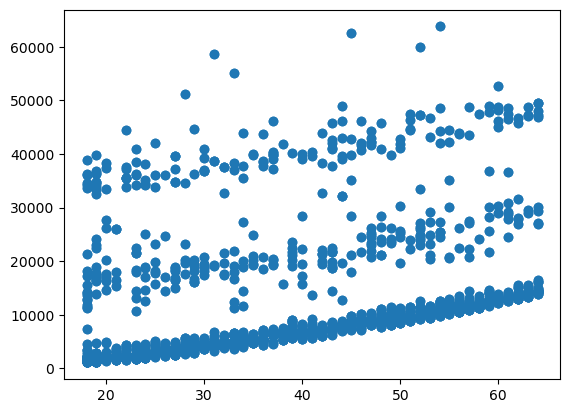

In [164]:
#ols-Ordinary Least Square
x=df['age'].tolist()
y=df['charges'].tolist()
#print(x,y)
max_x=df['age'].max()
min_x=df['charges'].min()
plt.scatter(x,y)
x = np.arange(min_x, max_x, 1)
y = 1.0143 * x - 0.4618
plt.plot(y, 'r')
plt.show()

#x=sm.add_constant(x)
#res=sm.OLS(y,x).fit()
#print(res.summary())